Files already downloaded and verified
Files already downloaded and verified


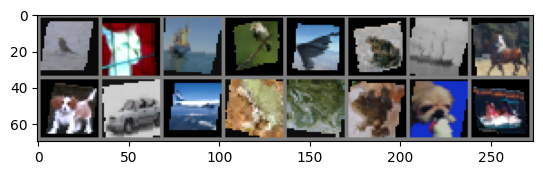

 bird   cat  ship  bird plane  frog  ship horse   dog   car plane  frog  frog  frog   dog  ship


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 定义数据预处理的transforms
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(),  # 随机水平翻转
     transforms.RandomCrop(32, padding=4),  # 随机裁剪
     transforms.RandomRotation(15),  # 随机旋转
     transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),  # 随机仿射变换
     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机颜色变换
     transforms.ToTensor(),  # 转换为Tensor格式
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # 标准化

# 加载训练集和测试集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=0)

# 类别标签
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 可视化部分训练集图像
def imshow(img):
    img = img / 2 + 0.5     # 反标准化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

# 显示图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(' '.join('%5s' % classes[labels[j]] for j in range(16)))

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

In [3]:
# 定义 CNN 模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 第一层卷积层，输入通道数为 3，输出通道数为 6，卷积核大小为 5x5
        self.pool = nn.MaxPool2d(2, 2)  # 最大池化层，池化核大小为 2x2
        self.conv2 = nn.Conv2d(6, 16, 5)  # 第二层卷积层，输入通道数为 6，输出通道数为 16，卷积核大小为 5x5
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 全连接层，输入节点数为 16*5*5，输出节点数为 120
        self.fc2 = nn.Linear(120, 84)  # 全连接层，输入节点数为 120，输出节点数为 84
        self.fc3 = nn.Linear(84, 10)  # 全连接层，输入节点数为 84，输出节点数为 10（CIFAR-10 数据集共有 10 类）

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 第一层卷积、激活和池化
        x = self.pool(F.relu(self.conv2(x)))  # 第二层卷积、激活和池化
        x = x.view(-1, 16 * 5 * 5)  # 将特征图展平为一维向量
        x = F.relu(self.fc1(x))  # 第一层全连接层和激活
        x = F.relu(self.fc2(x))  # 第二层全连接层和激活
        x = self.fc3(x)  # 第三层全连接层
        return x

In [4]:
# 定义损失函数和优化器
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 训练模型
num_epochs = 20  # 设置训练的轮数
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # 检查是否可用 GPU
net.to(device)  # 将模型移到 GPU 上
net.train()  # 设置模型为训练模式

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # 将数据移到 GPU 上

        optimizer.zero_grad()  # 清零梯度

        outputs = net(inputs)  # 前向传播
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重

        running_loss += loss.item()

    # 打印每个 epoch 的损失
    print("Epoch [{}/{}], Loss: {:.4f}".format(epoch + 1, num_epochs, running_loss / len(trainloader)))

print("Finished training")

# 测试模型
net.eval()  # 设置模型为评估模式
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)  # 将数据移到 GPU 上

        outputs = net(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

print("Accuracy of the network on the 10000 test images: {:.2f}%".format(100 * correct / total))

Epoch [1/20], Loss: 2.1769
Epoch [2/20], Loss: 1.8374
Epoch [3/20], Loss: 1.6941
Epoch [4/20], Loss: 1.6082
Epoch [5/20], Loss: 1.5463
Epoch [6/20], Loss: 1.4938
Epoch [7/20], Loss: 1.4546
Epoch [8/20], Loss: 1.4217
Epoch [9/20], Loss: 1.3959
Epoch [10/20], Loss: 1.3724
Epoch [11/20], Loss: 1.3541
Epoch [12/20], Loss: 1.3343
Epoch [13/20], Loss: 1.3228
Epoch [14/20], Loss: 1.3112
Epoch [15/20], Loss: 1.2894
Epoch [16/20], Loss: 1.2857
Epoch [17/20], Loss: 1.2710
Epoch [18/20], Loss: 1.2599
Epoch [19/20], Loss: 1.2528
Epoch [20/20], Loss: 1.2515
Finished training
Accuracy of the network on the 10000 test images: 55.16%


In [5]:
# 保存训练好的模型参数
torch.save(net.state_dict(), 'cifar_net.pth')
print("Finished training and saved model parameters to cifar_net.pth")

Finished training and saved model parameters to cifar_net.pth


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


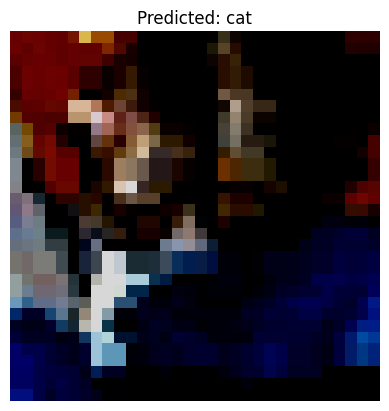

In [6]:
# 加载已经训练好的模型
net = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # 检查是否可用 GPU
net.load_state_dict(torch.load('cifar_net.pth', map_location=device))  # 加载模型参数并将其移到当前设备上
net.to(device)  # 将模型移到 GPU 上
net.eval()  # 设置模型为评估模式

# 预测图像并可视化
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.to(device)  # 将图像移到 GPU 上
labels = labels.to(device)  # 将标签移到 GPU 上

outputs = net(images)
_, predicted = torch.max(outputs, 1)

# 可视化预测结果
plt.imshow(images[0].cpu().numpy().transpose(1, 2, 0))
plt.title('Predicted: {}'.format(class_names[predicted[0].item()]))
plt.axis('off')
plt.show()

In [1]:
import torch
import torch.nn as nn
class Model_1(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_1, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),  # Update input channels to 3 for CIFAR-10 dataset
            # 特征图大小：16@30*30 (for CIFAR-10)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@15*15 (for CIFAR-10)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*15*15, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_2(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),  # Update input channels to 3 for CIFAR-10 dataset
            # 特征图大小：16@30*30 (for CIFAR-10)
            nn.Sigmoid(),
            nn.MaxPool2d(2),
            # 特征图大小：16@15*15 (for CIFAR-10)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 15 * 15, 256),
            nn.Sigmoid(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_3(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_3, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),  # Update input channels to 3 for CIFAR-10 dataset
            # 特征图大小：16@30*30 (for CIFAR-10)
            nn.Tanh(),
            nn.MaxPool2d(2),
            # 特征图大小：16@15*15 (for CIFAR-10)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*15*15, 256),
            nn.Tanh(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x
    
class Model_4(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_4, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            # 特征图大小：16@32*32
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@16*16
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*16*16, 256),
            nn.LeakyReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

device is cuda:0
Files already downloaded and verified
Files already downloaded and verified
Epoch:1 | Step:   500 | train_loss: 1.961
Epoch:1 | Step:  1000 | train_loss: 1.756
Epoch:1 | Step:  1500 | train_loss: 1.686
Epoch:1 | Step:  2000 | train_loss: 1.621
Epoch:1 | Step:  2500 | train_loss: 1.608
Epoch:1 | Step:  3000 | train_loss: 1.580
Epoch:2 | Step:   500 | train_loss: 1.543
Epoch:2 | Step:  1000 | train_loss: 1.540
Epoch:2 | Step:  1500 | train_loss: 1.522
Epoch:2 | Step:  2000 | train_loss: 1.509
Epoch:2 | Step:  2500 | train_loss: 1.508
Epoch:2 | Step:  3000 | train_loss: 1.481
Epoch:3 | Step:   500 | train_loss: 1.475
Epoch:3 | Step:  1000 | train_loss: 1.461
Epoch:3 | Step:  1500 | train_loss: 1.443
Epoch:3 | Step:  2000 | train_loss: 1.433
Epoch:3 | Step:  2500 | train_loss: 1.447
Epoch:3 | Step:  3000 | train_loss: 1.444
Epoch:4 | Step:   500 | train_loss: 1.421
Epoch:4 | Step:  1000 | train_loss: 1.424
Epoch:4 | Step:  1500 | train_loss: 1.409
Epoch:4 | Step:  2000 | t

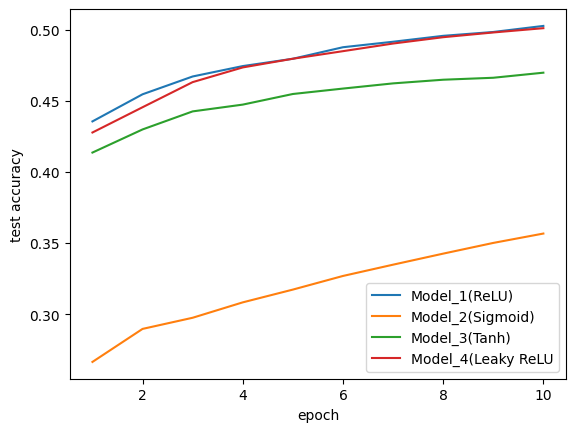

In [4]:
import torchvision.transforms as transforms
import torchvision
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


def main():
    # 指定设备
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('device is %s' % device)

    # 定义数据预处理的transforms
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),  # 随机水平翻转
        transforms.RandomCrop(32, padding=4),  # 随机裁剪
        transforms.RandomRotation(15),  # 随机旋转
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),  # 随机仿射变换
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机颜色变换
        transforms.ToTensor(),  # 转换为Tensor格式
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # 标准化

    # 加载训练集和测试集
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                            shuffle=True, num_workers=0)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                            shuffle=False, num_workers=0)

    # 构造网络
    net_1 = Model_1()
    net_1.to(device)

    net_2 = Model_2()
    net_2.to(device)

    net_3 = Model_3()
    net_3.to(device)

    net_4 = Model_4()
    net_4.to(device)

    loss_function = nn.CrossEntropyLoss()
    optimizer_1 = optim.Adam(net_1.parameters(), lr=0.001)
    optimizer_2 = optim.Adam(net_2.parameters(), lr=0.001)
    optimizer_3 = optim.Adam(net_3.parameters(), lr=0.001)
    optimizer_4 = optim.Adam(net_4.parameters(), lr=0.001)

    # 训练网络
    # net_1.train()  None BN and Dropout
    num_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    correct_1 = 0
    total_1 = 0
    accuracy_1 = []

    correct_2 = 0
    total_2 = 0
    accuracy_2 = []

    correct_3 = 0
    total_3 = 0
    accuracy_3 = []

    correct_4 = 0
    total_4 = 0
    accuracy_4 = []

    # Model_1
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_1.zero_grad()
            outputs = net_1(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_1.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_1(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_1 += labels.size(0)
                correct_1 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_1.append(correct_1 / total_1)
    print('Model_1 Finished')

    # Model_2
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_2.zero_grad()
            outputs = net_2(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_2.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_2(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_2 += labels.size(0)
                correct_2 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_2.append(correct_2 / total_2)
    print('Model_2 Finished')

    # Model_3
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_3.zero_grad()
            outputs = net_3(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_3.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_3(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_3 += labels.size(0)
                correct_3 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_3.append(correct_3 / total_3)
    print('Model_3 Finished')

    # Model_4
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_4.zero_grad()
            outputs = net_4(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_4.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_4(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_4 += labels.size(0)
                correct_4 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_4.append(correct_4 / total_4)
    print('Model_4 Finished')

    plt.figure()
    plt.plot(num_epochs, accuracy_1, label='Model_1(ReLU)')
    plt.plot(num_epochs, accuracy_2, label='Model_2(Sigmoid)')
    plt.plot(num_epochs, accuracy_3, label='Model_3(Tanh)')
    plt.plot(num_epochs, accuracy_4, label='Model_4(Leaky ReLU')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.legend(loc='best')
    plt.show()


if __name__ == '__main__':
    main()

In [5]:
class Model_1(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_1, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),  # Modified to accept 3 channels for CIFAR-10 dataset
            # Feature map size: 16@30*30 (changed from 26*26 to maintain feature map size)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # Feature map size: 16@15*15
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*15*15, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x
    
class Model_2(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3),  # Modified to accept 3 channels for CIFAR-10 dataset
            # Feature map size: 32@30*30 (changed from 26*26 to maintain feature map size)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # Feature map size: 32@15*15
        )
        self.classifier = nn.Sequential(
            nn.Linear(32*15*15, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

class Model_3(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_3, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 48, kernel_size=3),  # Modified to accept 3 channels for CIFAR-10 dataset
            # Feature map size: 48@30*30 (changed from 26*26 to maintain feature map size)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # Feature map size: 48@15*15
        )
        self.classifier = nn.Sequential(
            nn.Linear(48*15*15, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

class Model_4(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_4, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3),  # 修改为接受3通道输入
            # 特征图大小：64@30*30 (与CIFAR-10的输入尺寸相符)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：64@15*15
        )
        self.classifier = nn.Sequential(
            nn.Linear(64*15*15, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

device is cuda:0
Files already downloaded and verified
Files already downloaded and verified
Epoch:1 | Step:   500 | train_loss: 1.970
Epoch:1 | Step:  1000 | train_loss: 1.766
Epoch:1 | Step:  1500 | train_loss: 1.674
Epoch:1 | Step:  2000 | train_loss: 1.642
Epoch:1 | Step:  2500 | train_loss: 1.618
Epoch:1 | Step:  3000 | train_loss: 1.560
Epoch:2 | Step:   500 | train_loss: 1.570
Epoch:2 | Step:  1000 | train_loss: 1.538
Epoch:2 | Step:  1500 | train_loss: 1.530
Epoch:2 | Step:  2000 | train_loss: 1.503
Epoch:2 | Step:  2500 | train_loss: 1.500
Epoch:2 | Step:  3000 | train_loss: 1.519
Epoch:3 | Step:   500 | train_loss: 1.471
Epoch:3 | Step:  1000 | train_loss: 1.443
Epoch:3 | Step:  1500 | train_loss: 1.482
Epoch:3 | Step:  2000 | train_loss: 1.449
Epoch:3 | Step:  2500 | train_loss: 1.450
Epoch:3 | Step:  3000 | train_loss: 1.438
Epoch:4 | Step:   500 | train_loss: 1.433
Epoch:4 | Step:  1000 | train_loss: 1.398
Epoch:4 | Step:  1500 | train_loss: 1.409
Epoch:4 | Step:  2000 | t

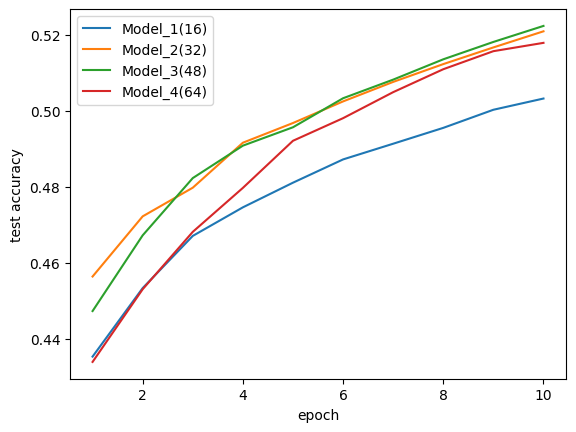

In [6]:
def main():
    # 指定设备
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('device is %s' % device)

    # 定义数据预处理的transforms
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),  # 随机水平翻转
        transforms.RandomCrop(32, padding=4),  # 随机裁剪
        transforms.RandomRotation(15),  # 随机旋转
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),  # 随机仿射变换
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机颜色变换
        transforms.ToTensor(),  # 转换为Tensor格式
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # 标准化

    # 加载训练集和测试集
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                            shuffle=True, num_workers=0)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                            shuffle=False, num_workers=0)

    # 构造网络
    net_1 = Model_1()
    net_1.to(device)

    net_2 = Model_2()
    net_2.to(device)

    net_3 = Model_3()
    net_3.to(device)

    net_4 = Model_4()
    net_4.to(device)

    loss_function = nn.CrossEntropyLoss()
    optimizer_1 = optim.Adam(net_1.parameters(), lr=0.001)
    optimizer_2 = optim.Adam(net_2.parameters(), lr=0.001)
    optimizer_3 = optim.Adam(net_3.parameters(), lr=0.001)
    optimizer_4 = optim.Adam(net_4.parameters(), lr=0.001)

    # 训练网络
    # net_1.train()  None BN and Dropout
    num_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    correct_1 = 0
    total_1 = 0
    accuracy_1 = []

    correct_2 = 0
    total_2 = 0
    accuracy_2 = []

    correct_3 = 0
    total_3 = 0
    accuracy_3 = []

    correct_4 = 0
    total_4 = 0
    accuracy_4 = []

    # Model_1
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_1.zero_grad()
            outputs = net_1(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_1.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_1(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_1 += labels.size(0)
                correct_1 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_1.append(correct_1 / total_1)
    print('Model_1 Finished')

    # Model_2
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_2.zero_grad()
            outputs = net_2(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_2.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_2(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_2 += labels.size(0)
                correct_2 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_2.append(correct_2 / total_2)
    print('Model_2 Finished')

    # Model_3
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_3.zero_grad()
            outputs = net_3(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_3.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_3(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_3 += labels.size(0)
                correct_3 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_3.append(correct_3 / total_3)
    print('Model_3 Finished')

    # Model_4
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_4.zero_grad()
            outputs = net_4(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_4.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_4(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_4 += labels.size(0)
                correct_4 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_4.append(correct_4 / total_4)
    print('Model_4 Finished')

    plt.figure()
    plt.plot(num_epochs, accuracy_1, label='Model_1(16)')
    plt.plot(num_epochs, accuracy_2, label='Model_2(32)')
    plt.plot(num_epochs, accuracy_3, label='Model_3(48)')
    plt.plot(num_epochs, accuracy_4, label='Model_4(64)')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.legend(loc='best')
    plt.show()


if __name__ == '__main__':
    main()

In [7]:
class Model_1(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_1, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),
            # 特征图大小：16@30*30 (CIFAR-10 images are 32x32, so after a 3x3 convolution, the feature map size becomes 30x30)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@15*15
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*15*15, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_2(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),
            # 特征图大小：16@30*30
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@15*15
            nn.Conv2d(16, 32, kernel_size=3),
            # 特征图大小：32@13*13
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：32@6*6
        )
        self.classifier = nn.Sequential(
            nn.Linear(32*6*6, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_3(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_3, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),
            # 特征图大小：16@30*30
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@15*15
            nn.Conv2d(16, 32, kernel_size=3),
            # 特征图大小：32@13*13
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：32@6*6
            nn.Conv2d(32, 48, kernel_size=3),
            # 特征图大小：48@4*4
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：48@2*2
        )
        self.classifier = nn.Sequential(
            nn.Linear(48*2*2, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

device is cuda:0
Files already downloaded and verified
Files already downloaded and verified
Epoch:1 | Step:   500 | train_loss: 1.933
Epoch:1 | Step:  1000 | train_loss: 1.721
Epoch:1 | Step:  1500 | train_loss: 1.666
Epoch:1 | Step:  2000 | train_loss: 1.615
Epoch:1 | Step:  2500 | train_loss: 1.559
Epoch:1 | Step:  3000 | train_loss: 1.579
Epoch:2 | Step:   500 | train_loss: 1.527
Epoch:2 | Step:  1000 | train_loss: 1.535
Epoch:2 | Step:  1500 | train_loss: 1.517
Epoch:2 | Step:  2000 | train_loss: 1.511
Epoch:2 | Step:  2500 | train_loss: 1.491
Epoch:2 | Step:  3000 | train_loss: 1.457
Epoch:3 | Step:   500 | train_loss: 1.471
Epoch:3 | Step:  1000 | train_loss: 1.465
Epoch:3 | Step:  1500 | train_loss: 1.470
Epoch:3 | Step:  2000 | train_loss: 1.436
Epoch:3 | Step:  2500 | train_loss: 1.439
Epoch:3 | Step:  3000 | train_loss: 1.420
Epoch:4 | Step:   500 | train_loss: 1.431
Epoch:4 | Step:  1000 | train_loss: 1.398
Epoch:4 | Step:  1500 | train_loss: 1.418
Epoch:4 | Step:  2000 | t

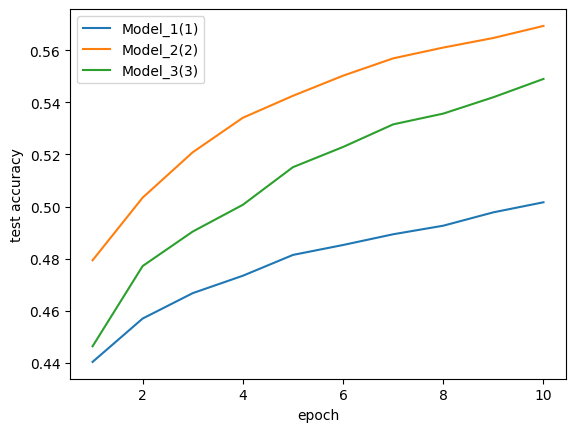

In [8]:
def main():
    # 指定设备
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('device is %s' % device)

    # 定义数据预处理的transforms
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),  # 随机水平翻转
        transforms.RandomCrop(32, padding=4),  # 随机裁剪
        transforms.RandomRotation(15),  # 随机旋转
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),  # 随机仿射变换
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机颜色变换
        transforms.ToTensor(),  # 转换为Tensor格式
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # 标准化

    # 加载训练集和测试集
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                            shuffle=True, num_workers=0)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                            shuffle=False, num_workers=0)

    # 构造网络
    net_1 = Model_1()
    net_1.to(device)

    net_2 = Model_2()
    net_2.to(device)

    net_3 = Model_3()
    net_3.to(device)

    loss_function = nn.CrossEntropyLoss()
    optimizer_1 = optim.Adam(net_1.parameters(), lr=0.001)
    optimizer_2 = optim.Adam(net_2.parameters(), lr=0.001)
    optimizer_3 = optim.Adam(net_3.parameters(), lr=0.001)

    # 训练网络
    # net_1.train()  None BN and Dropout
    num_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    correct_1 = 0
    total_1 = 0
    accuracy_1 = []

    correct_2 = 0
    total_2 = 0
    accuracy_2 = []

    correct_3 = 0
    total_3 = 0
    accuracy_3 = []

    # Model_1
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_1.zero_grad()
            outputs = net_1(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_1.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_1(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_1 += labels.size(0)
                correct_1 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_1.append(correct_1 / total_1)
    print('Model_1 Finished')

    # Model_2
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_2.zero_grad()
            outputs = net_2(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_2.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_2(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_2 += labels.size(0)
                correct_2 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_2.append(correct_2 / total_2)
    print('Model_2 Finished')

    # Model_3
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_3.zero_grad()
            outputs = net_3(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_3.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_3(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_3 += labels.size(0)
                correct_3 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_3.append(correct_3 / total_3)
    print('Model_3 Finished')

    plt.figure()
    plt.plot(num_epochs, accuracy_1, label='Model_1(1)')
    plt.plot(num_epochs, accuracy_2, label='Model_2(2)')
    plt.plot(num_epochs, accuracy_3, label='Model_3(3)')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.legend(loc='best')
    plt.show()


if __name__ == '__main__':
    main()

In [9]:
class Model_1(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_1, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            # 特征图大小：16@32*32
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@16*16
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*16*16, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

class Model_2(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            # 特征图大小：16@32*32
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@16*16
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*16*16, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

class Model_3(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_3, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=7, padding=3),
            # 特征图大小：16@32*32
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@16*16
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*16*16, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

device is cuda:0
Files already downloaded and verified
Files already downloaded and verified
Epoch:1 | Step:   500 | train_loss: 1.942
Epoch:1 | Step:  1000 | train_loss: 1.709
Epoch:1 | Step:  1500 | train_loss: 1.658
Epoch:1 | Step:  2000 | train_loss: 1.616
Epoch:1 | Step:  2500 | train_loss: 1.587
Epoch:1 | Step:  3000 | train_loss: 1.553
Epoch:2 | Step:   500 | train_loss: 1.526
Epoch:2 | Step:  1000 | train_loss: 1.516
Epoch:2 | Step:  1500 | train_loss: 1.509
Epoch:2 | Step:  2000 | train_loss: 1.485
Epoch:2 | Step:  2500 | train_loss: 1.498
Epoch:2 | Step:  3000 | train_loss: 1.489
Epoch:3 | Step:   500 | train_loss: 1.450
Epoch:3 | Step:  1000 | train_loss: 1.450
Epoch:3 | Step:  1500 | train_loss: 1.447
Epoch:3 | Step:  2000 | train_loss: 1.449
Epoch:3 | Step:  2500 | train_loss: 1.427
Epoch:3 | Step:  3000 | train_loss: 1.416
Epoch:4 | Step:   500 | train_loss: 1.416
Epoch:4 | Step:  1000 | train_loss: 1.402
Epoch:4 | Step:  1500 | train_loss: 1.405
Epoch:4 | Step:  2000 | t

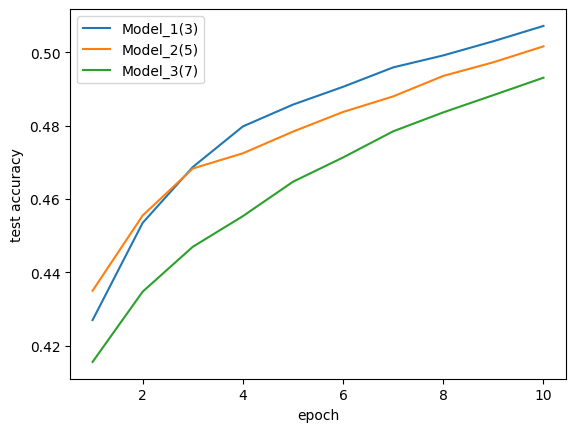

In [10]:
def main():
    # 指定设备
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('device is %s' % device)

    # 定义数据预处理的transforms
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),  # 随机水平翻转
        transforms.RandomCrop(32, padding=4),  # 随机裁剪
        transforms.RandomRotation(15),  # 随机旋转
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),  # 随机仿射变换
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机颜色变换
        transforms.ToTensor(),  # 转换为Tensor格式
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # 标准化

    # 加载训练集和测试集
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                            shuffle=True, num_workers=0)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                            shuffle=False, num_workers=0)

    # 构造网络
    net_1 = Model_1()
    net_1.to(device)

    net_2 = Model_2()
    net_2.to(device)

    net_3 = Model_3()
    net_3.to(device)

    loss_function = nn.CrossEntropyLoss()
    optimizer_1 = optim.Adam(net_1.parameters(), lr=0.001)
    optimizer_2 = optim.Adam(net_2.parameters(), lr=0.001)
    optimizer_3 = optim.Adam(net_3.parameters(), lr=0.001)

    # 训练网络
    # net_1.train()  None BN and Dropout
    num_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    correct_1 = 0
    total_1 = 0
    accuracy_1 = []

    correct_2 = 0
    total_2 = 0
    accuracy_2 = []

    correct_3 = 0
    total_3 = 0
    accuracy_3 = []

    # Model_1
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_1.zero_grad()
            outputs = net_1(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_1.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_1(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_1 += labels.size(0)
                correct_1 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_1.append(correct_1 / total_1)
    print('Model_1 Finished')

    # Model_2
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_2.zero_grad()
            outputs = net_2(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_2.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_2(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_2 += labels.size(0)
                correct_2 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_2.append(correct_2 / total_2)
    print('Model_2 Finished')

    # Model_3
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_3.zero_grad()
            outputs = net_3(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_3.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_3(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_3 += labels.size(0)
                correct_3 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_3.append(correct_3 / total_3)
    print('Model_3 Finished')

    plt.figure()
    plt.plot(num_epochs, accuracy_1, label='Model_1(3)')
    plt.plot(num_epochs, accuracy_2, label='Model_2(5)')
    plt.plot(num_epochs, accuracy_3, label='Model_3(7)')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.legend(loc='best')
    plt.show()

if __name__ == '__main__':
    main()

In [13]:
import torch
import torch.nn as nn

class Model_1(nn.Module):
    def __init__(self, num_classes=10):
        super(Model_1, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size = 3), # Modified to accept 3 input channels for CIFAR-10 dataset
            # Feature map size: 16@30*30
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2),
            # Feature map size: 16@15*15
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 15 * 15, 256),
            nn.ReLU(inplace = True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim = 1)
        x = self.classifier(x)
        return x

class Model_2(nn.Module):
    def __init__(self, num_classes = 10):
        super(Model_2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size = 3), # Modified to accept 3 input channels for CIFAR-10 dataset
            # Feature map size: 16@30*30
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2),
            # Feature map size: 16@15*15
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 15 * 15, 64),
            nn.ReLU(inplace = True),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim = 1)
        x = self.classifier(x)
        return x

class Model_3(nn.Module):
    def __init__(self, num_classes = 10):
        super(Model_3, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size = 3), # Modified to accept 3 input channels for CIFAR-10 dataset
            # Feature map size: 16@30*30
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2),
            # Feature map size: 16@15*15
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 15 * 15, 128),
            nn.ReLU(inplace = True),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim = 1)
        x = self.classifier(x)
        return x

class Model_4(nn.Module):
    def __init__(self, num_classes = 10):
        super(Model_4, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size = 3), # Modified to accept 3 input channels for CIFAR-10 dataset
            # Feature map size: 16@30*30
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2),
            # Feature map size: 16@15*15
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 15 * 15, 512),
            nn.ReLU(inplace = True),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim = 1)
        x = self.classifier(x)
        return x
    
class Model_5(nn.Module):
    def __init__(self, num_classes=10):
        super(Model_5, self).__init__()  # Update to reference Model_5
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),  # Modified to accept 3 input channels for CIFAR-10 dataset
            # Feature map size: 16@30*30
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # Feature map size: 16@15*15
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 15 * 15, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

device is cuda:0
Files already downloaded and verified
Files already downloaded and verified
Epoch:1 | Step:   500 | train_loss: 1.963
Epoch:1 | Step:  1000 | train_loss: 1.738
Epoch:1 | Step:  1500 | train_loss: 1.665
Epoch:1 | Step:  2000 | train_loss: 1.619
Epoch:1 | Step:  2500 | train_loss: 1.606
Epoch:1 | Step:  3000 | train_loss: 1.557
Epoch:2 | Step:   500 | train_loss: 1.542
Epoch:2 | Step:  1000 | train_loss: 1.545
Epoch:2 | Step:  1500 | train_loss: 1.533
Epoch:2 | Step:  2000 | train_loss: 1.515
Epoch:2 | Step:  2500 | train_loss: 1.479
Epoch:2 | Step:  3000 | train_loss: 1.491
Epoch:3 | Step:   500 | train_loss: 1.454
Epoch:3 | Step:  1000 | train_loss: 1.468
Epoch:3 | Step:  1500 | train_loss: 1.449
Epoch:3 | Step:  2000 | train_loss: 1.450
Epoch:3 | Step:  2500 | train_loss: 1.440
Epoch:3 | Step:  3000 | train_loss: 1.444
Epoch:4 | Step:   500 | train_loss: 1.419
Epoch:4 | Step:  1000 | train_loss: 1.438
Epoch:4 | Step:  1500 | train_loss: 1.406
Epoch:4 | Step:  2000 | t

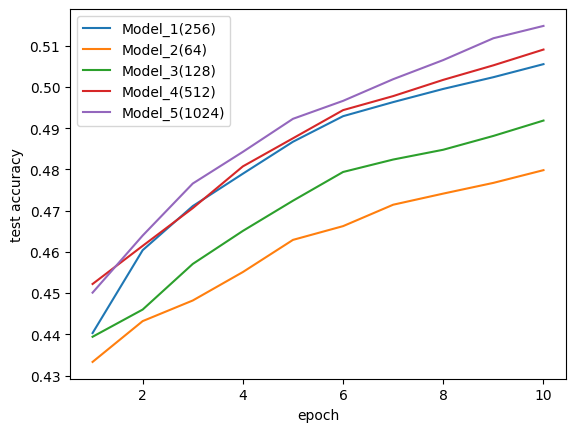

In [14]:
def main():
    # 指定设备
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('device is %s' % device)

    # 定义数据预处理的transforms
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),  # 随机水平翻转
        transforms.RandomCrop(32, padding=4),  # 随机裁剪
        transforms.RandomRotation(15),  # 随机旋转
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),  # 随机仿射变换
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机颜色变换
        transforms.ToTensor(),  # 转换为Tensor格式
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # 标准化

    # 加载训练集和测试集
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                            shuffle=True, num_workers=0)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                            shuffle=False, num_workers=0)

    # 构造网络
    net_1 = Model_1()
    net_1.to(device)

    net_2 = Model_2()
    net_2.to(device)

    net_3 = Model_3()
    net_3.to(device)

    net_4 = Model_4()
    net_4.to(device)

    net_5 = Model_5()
    net_5.to(device)

    loss_function = nn.CrossEntropyLoss()
    optimizer_1 = optim.Adam(net_1.parameters(), lr=0.001)
    optimizer_2 = optim.Adam(net_2.parameters(), lr=0.001)
    optimizer_3 = optim.Adam(net_3.parameters(), lr=0.001)
    optimizer_4 = optim.Adam(net_4.parameters(), lr=0.001)
    optimizer_5 = optim.Adam(net_5.parameters(), lr=0.001)

    # 训练网络
    # net_1.train()  None BN and Dropout
    num_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    correct_1 = 0
    total_1 = 0
    accuracy_1 = []

    correct_2 = 0
    total_2 = 0
    accuracy_2 = []

    correct_3 = 0
    total_3 = 0
    accuracy_3 = []

    correct_4 = 0
    total_4 = 0
    accuracy_4 = []

    correct_5 = 0
    total_5 = 0
    accuracy_5 = []

    # Model_1
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_1.zero_grad()
            outputs = net_1(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_1.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_1(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_1 += labels.size(0)
                correct_1 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_1.append(correct_1 / total_1)
    print('Model_1 Finished')

    # Model_2
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_2.zero_grad()
            outputs = net_2(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_2.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_2(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_2 += labels.size(0)
                correct_2 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_2.append(correct_2 / total_2)
    print('Model_2 Finished')

    # Model_3
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_3.zero_grad()
            outputs = net_3(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_3.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_3(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_3 += labels.size(0)
                correct_3 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_3.append(correct_3 / total_3)
    print('Model_3 Finished')

    # Model_4
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_4.zero_grad()
            outputs = net_4(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_4.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_4(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_4 += labels.size(0)
                correct_4 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_4.append(correct_4 / total_4)
    print('Model_4 Finished')

    # Model_5
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, start=0):
            inputs, labels = data
            optimizer_5.zero_grad()
            outputs = net_5(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_5.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in testloader:
                inputs, labels = data
                outputs = net_5(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_5 += labels.size(0)
                correct_5 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_5.append(correct_5 / total_5)
    print('Model_5 Finished')

    plt.figure()
    plt.plot(num_epochs, accuracy_1, label='Model_1(256)')
    plt.plot(num_epochs, accuracy_2, label='Model_2(64)')
    plt.plot(num_epochs, accuracy_3, label='Model_3(128)')
    plt.plot(num_epochs, accuracy_4, label='Model_4(512)')
    plt.plot(num_epochs, accuracy_5, label='Model_5(1024)')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.legend(loc='best')
    plt.show()


if __name__ == '__main__':
    main()

In [24]:
input_size = 28
num_classes = 10
num_epochs = 20
batch_size = 500

train_dataset = torchvision.datasets.CIFAR10(root='data',
                              train=True,
                              transform=torchvision.transforms.ToTensor())

test_dataset = torchvision.datasets.CIFAR10(root='data',
                             train=False,
                             transform=torchvision.transforms.ToTensor())
#构建 mini-batch
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [25]:
#构建 网络结构
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(in_channels = 3,
                                             out_channels = 32,
                                             kernel_size = 5,
                                             stride = 1,
                                             padding = 2),
                                   nn.ReLU(),
                                   nn.MaxPool2d(2),)
        self.conv2 = nn.Sequential(nn.Conv2d(32, 64, 5, 1, 2),
                                   nn.ReLU(),
                                   nn.MaxPool2d(2),)
        self.out = nn.Sequential(nn.Flatten(),
                                 nn.Linear(64 * 8 * 8, 256),
                                 nn.Dropout(),
                                 nn.ReLU(),
                                 nn.Linear(256, 10),)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        output = self.out(x)
        return output

In [26]:
#定义准确率作为评估标准
def accuracy(predictions, labels):
    pred = torch.max(predictions.data, 1)[1]            # torch.max()[0]返回最大值 torch.max()[1]返回最大值位置，既预测值
    rights = pred.eq(labels.data.view_as(pred)).sum()
    return rights, len(labels)                          # 这里返回的是正确个数与总个数组成的元组

In [28]:
net = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
net.cuda()
test_right = []
train_loss = []

for epoch in range(num_epochs):
    train_rights = []
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.cuda(), target.cuda()
        net.train()
        output = net(data)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        right = accuracy(output, target)
        train_rights.append(right)
        
        if batch_idx % 50 == 0:
            net.eval()
            val_rights = []
            
            for (data, target) in test_loader:
                data, target = data.cuda(), target.cuda()
                output = net(data)
                right = accuracy(output, target)
                val_rights.append(right)
            
            train_r = (sum([tup[0] for tup in train_rights]), sum([tup[1] for tup in train_rights]))
            val_r = (sum([tup[0] for tup in val_rights]), sum([tup[1] for tup in val_rights]))
            test_right.append((100*val_r[0]/val_r[1]).cpu().numpy())
            train_loss.append(loss.data.cpu().numpy())
            print(f'当前epoch：{epoch} [{batch_idx*batch_size}/{len(train_loader.dataset)}]   损失：{loss.data:.6f}  训练集准确率：{100*train_r[0]/train_r[1]:.2f}%   测试集准确率：{100*val_r[0]/val_r[1]:.2f}%')

当前epoch：0 [0/50000]   损失：2.305055  训练集准确率：8.80%   测试集准确率：10.00%
当前epoch：0 [25000/50000]   损失：1.798902  训练集准确率：28.14%   测试集准确率：40.66%
当前epoch：1 [0/50000]   损失：1.573500  训练集准确率：44.60%   测试集准确率：48.11%
当前epoch：1 [25000/50000]   损失：1.431099  训练集准确率：45.35%   测试集准确率：50.42%
当前epoch：2 [0/50000]   损失：1.393123  训练集准确率：51.20%   测试集准确率：53.49%
当前epoch：2 [25000/50000]   损失：1.431224  训练集准确率：51.33%   测试集准确率：55.71%
当前epoch：3 [0/50000]   损失：1.180668  训练集准确率：56.40%   测试集准确率：56.42%
当前epoch：3 [25000/50000]   损失：1.174668  训练集准确率：55.25%   测试集准确率：57.51%
当前epoch：4 [0/50000]   损失：1.231640  训练集准确率：57.80%   测试集准确率：60.84%
当前epoch：4 [25000/50000]   损失：1.117208  训练集准确率：58.00%   测试集准确率：61.29%
当前epoch：5 [0/50000]   损失：1.057596  训练集准确率：61.00%   测试集准确率：62.86%
当前epoch：5 [25000/50000]   损失：1.072768  训练集准确率：60.27%   测试集准确率：62.17%
当前epoch：6 [0/50000]   损失：1.071914  训练集准确率：63.00%   测试集准确率：64.44%
当前epoch：6 [25000/50000]   损失：1.103955  训练集准确率：63.09%   测试集准确率：64.36%
当前epoch：7 [0/50000]   损失：0.896389  训练集准确率：67.40%   测试集准确率：65.20

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim


class Model_1(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_1, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),  # Update input channels to 3 for CIFAR-10 dataset
            # 特征图大小：16@30*30 (for CIFAR-10)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@15*15 (for CIFAR-10)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*15*15, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_2(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),  # Update input channels to 3 for CIFAR-10 dataset
            # 特征图大小：16@30*30 (for CIFAR-10)
            nn.Sigmoid(),
            nn.MaxPool2d(2),
            # 特征图大小：16@15*15 (for CIFAR-10)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 15 * 15, 256),
            nn.Sigmoid(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_3(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_3, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),  # Update input channels to 3 for CIFAR-10 dataset
            # 特征图大小：16@30*30 (for CIFAR-10)
            nn.Tanh(),
            nn.MaxPool2d(2),
            # 特征图大小：16@15*15 (for CIFAR-10)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*15*15, 256),
            nn.Tanh(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x
    
class Model_4(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_4, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            # 特征图大小：16@32*32
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@16*16
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*16*16, 256),
            nn.LeakyReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

In [30]:
input_size = 28
num_classes = 10
num_epochs = 20
batch_size = 500

train_dataset = torchvision.datasets.CIFAR10(root='./data',
                              train=True,
                              transform=torchvision.transforms.ToTensor())

test_dataset = torchvision.datasets.CIFAR10(root='./data',
                             train=False,
                             transform=torchvision.transforms.ToTensor())
#构建 mini-batch
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [31]:
#定义准确率作为评估标准
def accuracy(predictions, labels):
    pred = torch.max(predictions.data, 1)[1]            #torch.max()[0]返回最大值 torch.max()[1]返回最大值位置，既预测值
    rights = pred.eq(labels.data.view_as(pred)).sum()
    return rights, len(labels) 
net = Model_1()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
net.cuda()
test_right = []
train_loss = []

for epoch in range(num_epochs):
    train_rights = []
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.cuda(), target.cuda()
        net.train()
        output = net(data)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        right = accuracy(output, target)
        train_rights.append(right)
        
        if batch_idx % 50 == 0:
            net.eval()
            val_rights = []
            
            for (data, target) in test_loader:
                data, target = data.cuda(), target.cuda()
                output = net(data)
                right = accuracy(output, target)
                val_rights.append(right)
            
            train_r = (sum([tup[0] for tup in train_rights]), sum([tup[1] for tup in train_rights]))
            val_r = (sum([tup[0] for tup in val_rights]), sum([tup[1] for tup in val_rights]))
            test_right.append((100*val_r[0]/val_r[1]).cpu().numpy())
            train_loss.append(loss.data.cpu().numpy())

            print(f'当前epoch：{epoch} [{batch_idx*batch_size}/{len(train_loader.dataset)}]   \
                  损失：{loss.data:.6f}  训练集准确率：{100*train_r[0]/train_r[1]:.2f}%   测试集准确率：{100*val_r[0]/val_r[1]:.2f}%')

当前epoch：0 [0/50000]                     损失：2.303229  训练集准确率：10.60%   测试集准确率：17.42%
当前epoch：0 [25000/50000]                     损失：1.694110  训练集准确率：32.95%   测试集准确率：41.69%
当前epoch：1 [0/50000]                     损失：1.562902  训练集准确率：42.20%   测试集准确率：46.12%
当前epoch：1 [25000/50000]                     损失：1.434430  训练集准确率：47.27%   测试集准确率：49.02%
当前epoch：2 [0/50000]                     损失：1.358949  训练集准确率：54.60%   测试集准确率：51.49%
当前epoch：2 [25000/50000]                     损失：1.319736  训练集准确率：53.04%   测试集准确率：52.38%
当前epoch：3 [0/50000]                     损失：1.233590  训练集准确率：56.20%   测试集准确率：54.53%
当前epoch：3 [25000/50000]                     损失：1.191000  训练集准确率：55.98%   测试集准确率：55.00%
当前epoch：4 [0/50000]                     损失：1.176909  训练集准确率：58.80%   测试集准确率：55.20%
当前epoch：4 [25000/50000]                     损失：1.186377  训练集准确率：58.39%   测试集准确率：57.47%
当前epoch：5 [0/50000]                     损失：1.100325  训练集准确率：62.80%   测试集准确率：57.44%
当前epoch：5 [25000/50000]                     损失：1.129530  训练集准确率：60.

In [9]:
import torch
import torch.nn as nn
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = nn.ReLU()(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = nn.ReLU()(out)
        return out


class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(64, 2)
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.layer4 = self._make_layer(512, 2, stride=2)
        self.linear = nn.Linear(512, num_classes)

    def _make_layer(self, planes, num_blocks, stride=1):
        layers = []
        layers.append(BasicBlock(self.in_planes, planes, stride))
        self.in_planes = planes * BasicBlock.expansion
        for _ in range(1, num_blocks):
            layers.append(BasicBlock(self.in_planes, planes))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = nn.ReLU()(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = nn.AdaptiveAvgPool2d(1)(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


# 定义数据预处理的transforms
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomCrop(32, padding=4),  # 随机裁剪
    transforms.RandomRotation(15),  # 随机旋转
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),  # 随机仿射变换
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 随机颜色变换
    transforms.ToTensor(),  # 转换为Tensor格式
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # 标准化


# 创建 ResNet-18 模型
net = ResNet()
num_epochs = 10
batch_size = 128

train_dataset = torchvision.datasets.CIFAR10(root='./data',
                              train=True,
                              transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data',
                             train=False,
                             transform=transform)
#构建 mini-batch
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)


# 定义准确率作为评估标准
def accuracy(predictions, labels):
    pred = torch.max(predictions.data, 1)[1]            #torch.max()[0]返回最大值 torch.max()[1]返回最大值位置，既预测值
    rights = pred.eq(labels.data.view_as(pred)).sum()
    return rights, len(labels) 


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
net.cuda()
test_right = []
train_loss = []
for epoch in range(num_epochs):
    train_rights = []
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.cuda(), target.cuda()
        net.train()
        output = net(data)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        right = accuracy(output, target)
        train_rights.append(right)
        
        if batch_idx % 50 == 0:
            net.eval()
            val_rights = []
            for (data, target) in test_loader:
                data, target = data.cuda(), target.cuda()
                output = net(data)
                right = accuracy(output, target)
                val_rights.append(right)
            train_r = (sum([tup[0] for tup in train_rights]), sum([tup[1] for tup in train_rights]))
            val_r = (sum([tup[0] for tup in val_rights]), sum([tup[1] for tup in val_rights]))
            test_right.append((100*val_r[0]/val_r[1]).cpu().numpy())
            train_loss.append(loss.data.cpu().numpy())
            print(f'当前epoch：{epoch} [{batch_idx*batch_size} / {len(train_loader.dataset)}]   \
                  损失：{loss.data:.6f}  训练集准确率：{100*train_r[0]/train_r[1]:.2f}%   测试集准确率：{100*val_r[0]/val_r[1]:.2f}%')

当前epoch：0 [0/50000]                     损失：2.388546  训练集准确率：8.59%   测试集准确率：10.71%
当前epoch：0 [6400/50000]                     损失：2.043266  训练集准确率：26.64%   测试集准确率：23.17%
当前epoch：0 [12800/50000]                     损失：1.654667  训练集准确率：29.49%   测试集准确率：36.55%
当前epoch：0 [19200/50000]                     损失：1.547314  训练集准确率：31.92%   测试集准确率：32.00%
当前epoch：0 [25600/50000]                     损失：1.535342  训练集准确率：33.98%   测试集准确率：40.17%
当前epoch：0 [32000/50000]                     损失：1.476913  训练集准确率：35.38%   测试集准确率：41.38%
当前epoch：0 [38400/50000]                     损失：1.451743  训练集准确率：37.01%   测试集准确率：43.44%
当前epoch：0 [44800/50000]                     损失：1.394815  训练集准确率：38.44%   测试集准确率：45.41%
当前epoch：1 [0/50000]                     损失：1.179431  训练集准确率：59.38%   测试集准确率：47.44%
当前epoch：1 [6400/50000]                     损失：1.462553  训练集准确率：50.84%   测试集准确率：46.09%
当前epoch：1 [12800/50000]                     损失：1.262263  训练集准确率：52.24%   测试集准确率：48.28%
当前epoch：1 [19200/50000]                     损失：1.32198

In [11]:
import pandas as pd
df = pd.DataFrame()
df['loss'] = train_loss
df['test_acc'] = test_right
df

,loss,test_acc
0,2.3885465,10.71
1,2.0432663,23.17
2,1.6546675,36.55
3,1.5473142,32.0
4,1.535342,40.17
...,...,...
75,0.61735684,77.02
76,0.51677036,77.939995
77,0.5042484,76.2
78,0.46647155,77.72


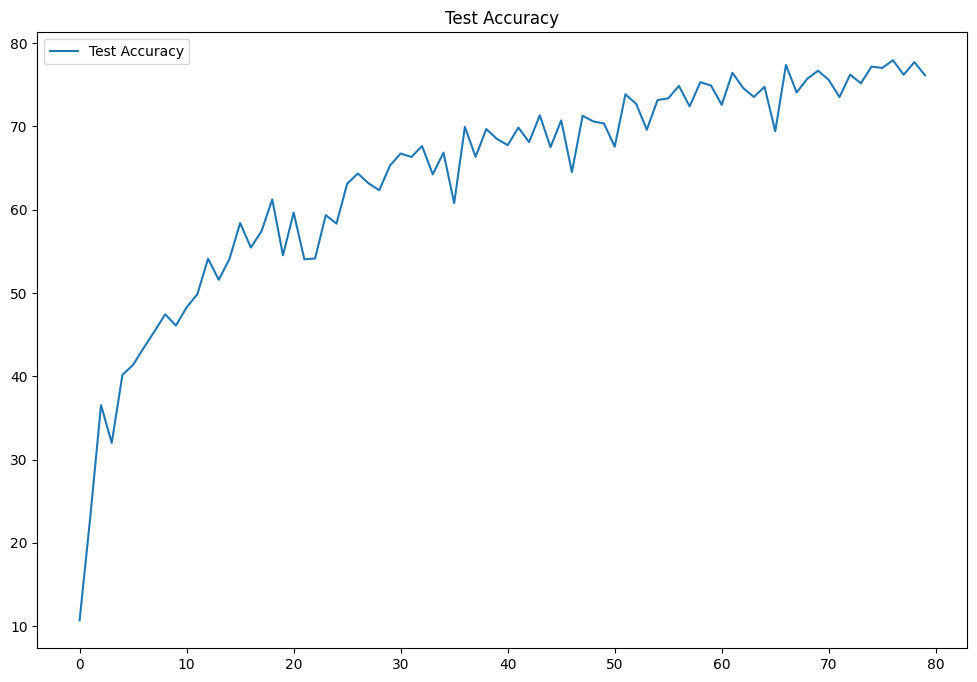

In [16]:
plt.figure(figsize = (12, 8))
plt.plot(df['test_acc'], label='Test Accuracy')
# 添加图例
plt.legend()
# 添加标题和轴标签
plt.title('Test Accuracy')
# 显示图形
plt.show()

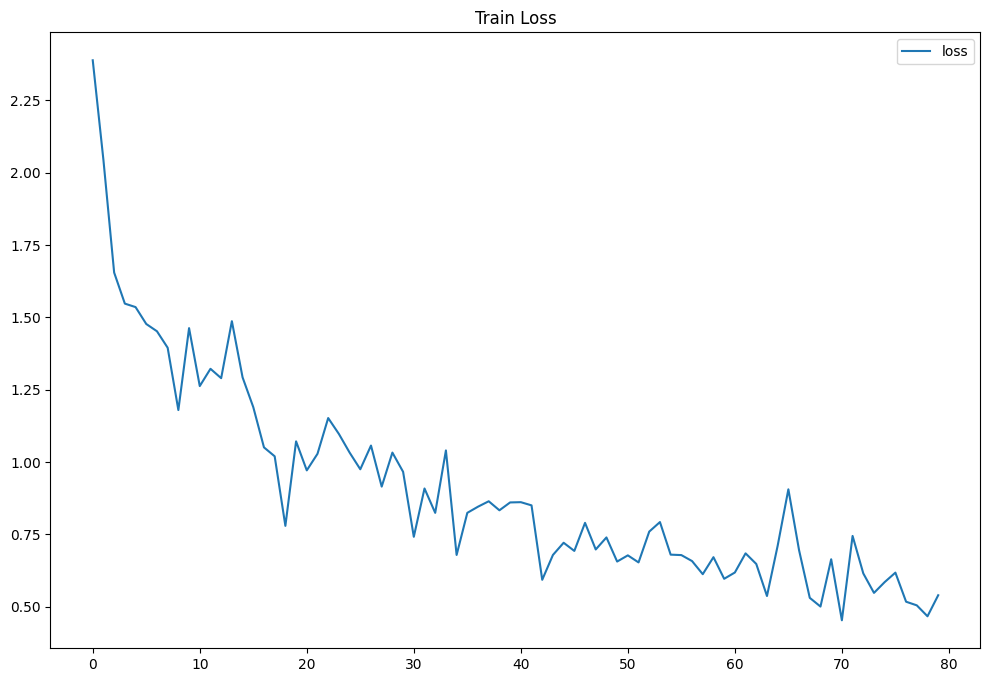

In [17]:
plt.figure(figsize = (12, 8))
plt.plot(df['loss'], label='loss')
# 添加图例
plt.legend()
# 添加标题和轴标签
plt.title('Train Loss')
# 显示图形
plt.show()